In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
it =pd.read_csv("diabetes.csv")

In [3]:
it.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
it.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
it.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
it.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
it.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
it.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, "['Age']")

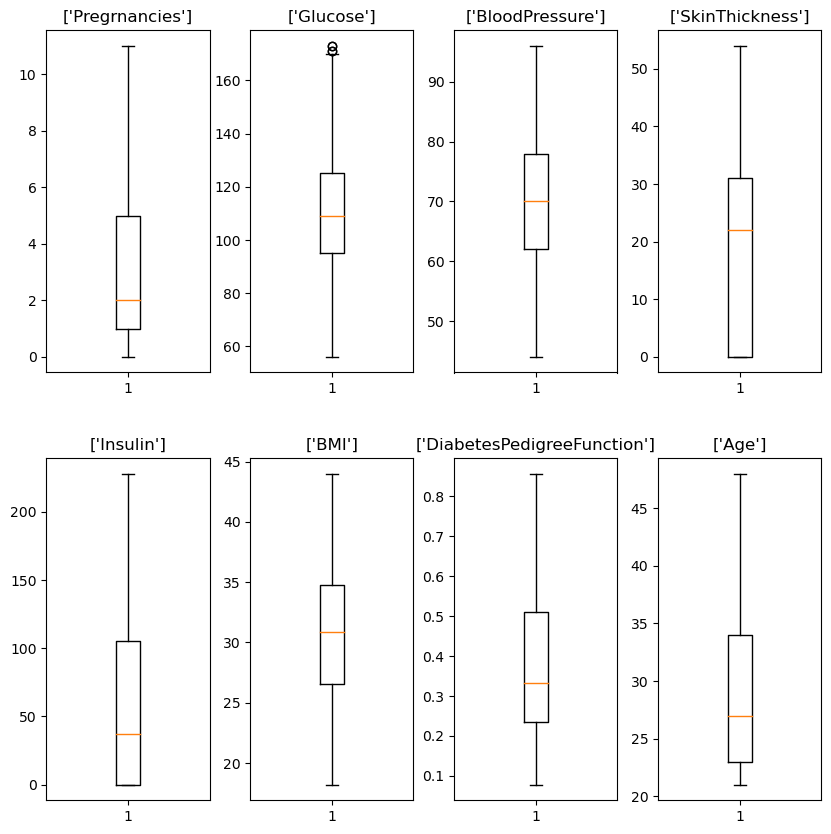

In [12]:
fig, ax = plt.subplots(2,4, figsize=(10,10))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(it['Pregnancies'])
ax[0][0].set_title(['Pregrnancies'])

ax[0][1].boxplot(it['Glucose'])
ax[0][1].set_title(['Glucose'])


ax[0][2].boxplot(it['BloodPressure'])
ax[0][2].set_title(['BloodPressure'])

ax[0][3].boxplot(it['SkinThickness'])
ax[0][3].set_title(['SkinThickness'])

ax[1][0].boxplot(it['Insulin'])
ax[1][0].set_title(['Insulin'])

ax[1][1].boxplot(it['BMI'])
ax[1][1].set_title(['BMI'])

ax[1][2].boxplot(it['DiabetesPedigreeFunction'])
ax[1][2].set_title(['DiabetesPedigreeFunction'])

ax[1][3].boxplot(it['Age'])
ax[1][3].set_title(['Age'])

In [13]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(it[field_name], 65) - np.percentile(it[field_name], 25))
    df.drop(df[it[field_name] > (iqr + np.percentile(it[field_name],65))].index, inplace=True)
    df.drop(df[it[field_name] < (np.percentile(it[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(it, 'Pregnancies')
drop_outliers(it, 'Glucose')
drop_outliers(it, 'BloodPressure')
drop_outliers(it, 'SkinThickness')
drop_outliers(it, 'Insulin')
drop_outliers(it, 'BMI')
drop_outliers(it, 'DiabetesPedigreeFunction')
drop_outliers(it, 'Age')

Text(0.5, 1.0, "['Age']")

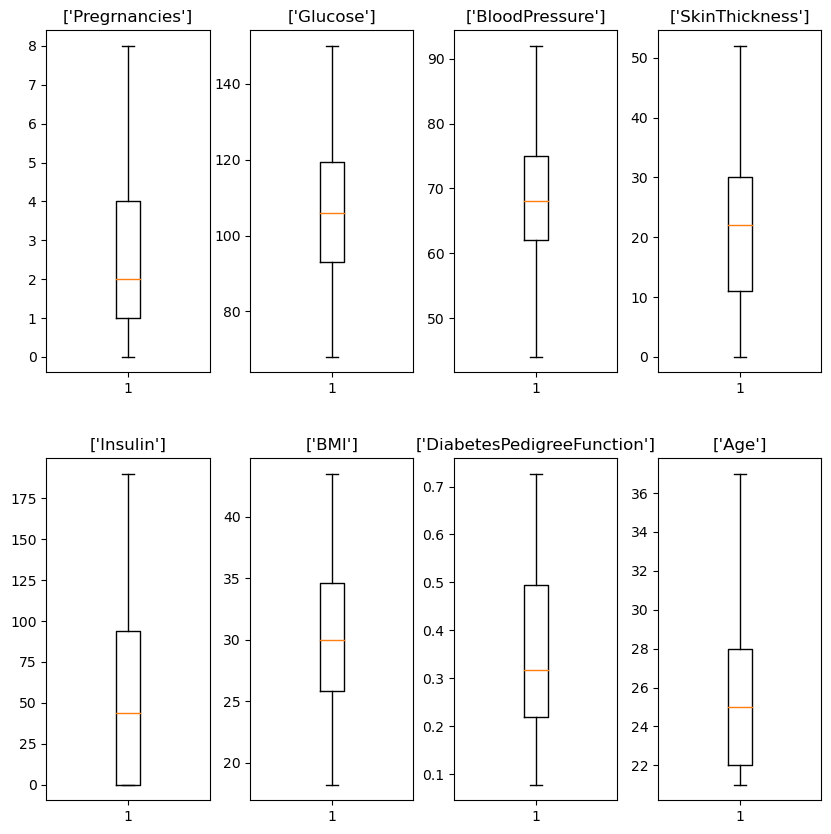

In [14]:
fig, ax = plt.subplots(2,4, figsize=(10,10))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(it['Pregnancies'])
ax[0][0].set_title(['Pregrnancies'])

ax[0][1].boxplot(it['Glucose'])
ax[0][1].set_title(['Glucose'])


ax[0][2].boxplot(it['BloodPressure'])
ax[0][2].set_title(['BloodPressure'])

ax[0][3].boxplot(it['SkinThickness'])
ax[0][3].set_title(['SkinThickness'])

ax[1][0].boxplot(it['Insulin'])
ax[1][0].set_title(['Insulin'])

ax[1][1].boxplot(it['BMI'])
ax[1][1].set_title(['BMI'])

ax[1][2].boxplot(it['DiabetesPedigreeFunction'])
ax[1][2].set_title(['DiabetesPedigreeFunction'])

ax[1][3].boxplot(it['Age'])
ax[1][3].set_title(['Age'])

In [15]:
corr = it.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.066506,0.143811,-0.099369,-0.117184,0.001989,-0.054773,0.511547,0.169721
Glucose,0.066506,1.000000,0.122563,-0.061737,0.169727,0.122586,0.019928,0.208508,0.276581
BloodPressure,0.143811,0.122563,1.000000,0.008063,-0.044278,0.200987,-0.027093,0.282615,0.028128
SkinThickness,-0.099369,-0.061737,0.008063,1.000000,0.415481,0.408849,0.036021,-0.067490,0.020020
Insulin,-0.117184,0.169727,-0.044278,0.415481,1.000000,0.177775,0.167570,-0.067521,0.011090
BMI,0.001989,0.122586,0.200987,0.408849,0.177775,1.000000,0.132098,0.086358,0.173759
DiabetesPedigreeFunction,-0.054773,0.019928,-0.027093,0.036021,0.167570,0.132098,1.000000,0.003885,0.103972
Age,0.511547,0.208508,0.282615,-0.067490,-0.067521,0.086358,0.003885,1.000000,0.190998
Outcome,0.169721,0.276581,0.028128,0.020020,0.011090,0.173759,0.103972,0.190998,1.000000


<Axes: >

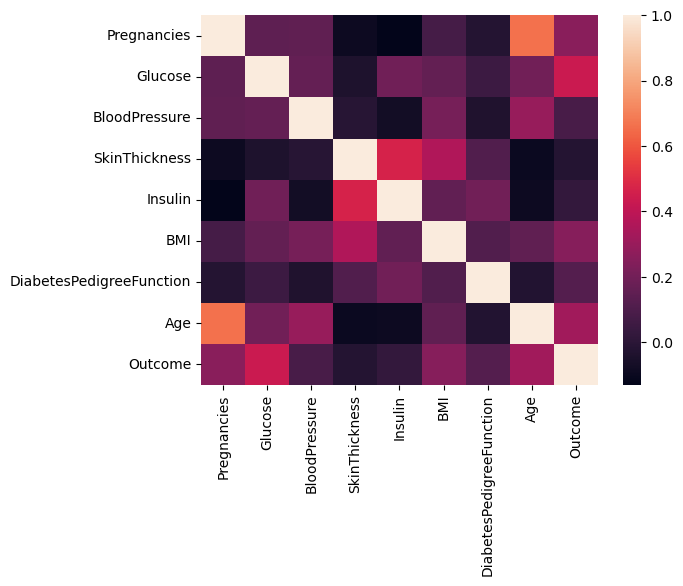

In [159]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [16]:
y =it["Outcome"]
x =it.drop("Outcome", axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [18]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
752,3,108,62,24,0,26.0,0.223,25
758,1,106,76,0,0,37.5,0.197,26
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [19]:
y

1      0
3      0
5      0
6      1
10     0
      ..
752    0
758    0
764    0
765    0
767    0
Name: Outcome, Length: 303, dtype: int64

In [20]:
rf = RandomForestClassifier(random_state=0)

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [22]:
y_pred=rf.predict(x_test)

In [23]:
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[68,  2],
       [ 6,  0]], dtype=int64)

In [25]:
cr=classification_report(y_test,y_pred)

In [26]:
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        70
           1       0.00      0.00      0.00         6

    accuracy                           0.89        76
   macro avg       0.46      0.49      0.47        76
weighted avg       0.85      0.89      0.87        76

[[68  2]
 [ 6  0]]


In [27]:
lg=LogisticRegression(random_state=0)

In [28]:
lg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_predict=lg.predict(x_test)

In [30]:
om=confusion_matrix(y_test,y_predict)

In [31]:
om

array([[67,  3],
       [ 6,  0]], dtype=int64)

In [32]:
cr=classification_report(y_test,y_predict)

In [33]:
cr

'              precision    recall  f1-score   support\n\n           0       0.92      0.96      0.94        70\n           1       0.00      0.00      0.00         6\n\n    accuracy                           0.88        76\n   macro avg       0.46      0.48      0.47        76\nweighted avg       0.85      0.88      0.86        76\n'

In [34]:
print(om)
print(cr)

[[67  3]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        70
           1       0.00      0.00      0.00         6

    accuracy                           0.88        76
   macro avg       0.46      0.48      0.47        76
weighted avg       0.85      0.88      0.86        76



In [35]:
import joblib

In [36]:
# model saving and loading
joblib.dump(rf, 'diabetes_rf.pkl')

['diabetes_rf.pkl']